# CodeAlpha Internship Task# 2 | Classifying Handwrittern Images using Convolutional Neural Network

## Importing Necessory Modules

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sb
from sklearn.metrics import confusion_matrix as cm, classification_report as cr
import cv2

## Downloading dataset

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
listt=['zero','one','two','three','four','five','six','seven','eight','nine','ten']
y_train[0]

5

## Plotting the some of the images

In [5]:
def plot_pic(x,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.xlabel(listt[y[index]])

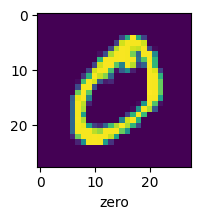

In [6]:
plot_pic(x_train,y_train,1)

## Scaling the Images

In [7]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

## Develop a Convolutional neural network using keras | Adding DropOut Layer to avoid overfitting

In [27]:
cnn=keras.Sequential([

    #CNN
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    #Dense
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [28]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Got an accuracy of 98.39 percent on training  dataset

In [29]:
cnn.fit(x_train_scaled,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 20ms/step - accuracy: 0.8796 - loss: 0.3924
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9790 - loss: 0.0676
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9839 - loss: 0.0511


# Got Accuracy of 99.0 Percent on test dataset

<BarContainer object of 3 artists>

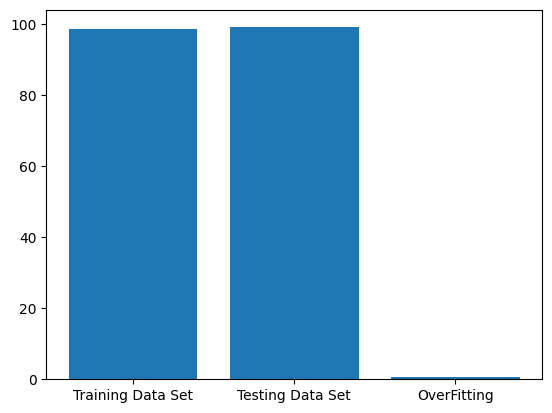

In [105]:
plt.bar(["Training Data Set","Testing Data Set","OverFitting"],[98.39,99.0,(99.0-98.39)])

In [103]:
cnn.evaluate(x_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9875 - loss: 0.0391


[0.031097549945116043, 0.9902999997138977]

In [104]:
y_pred=cnn.predict(x_test_scaled)
predicted=[np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


# Got precision , recall , and F1 score approximately equals to 100 percent

In [108]:
print(cr(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Confusion Matrix to analyze the accuracy

<Axes: >

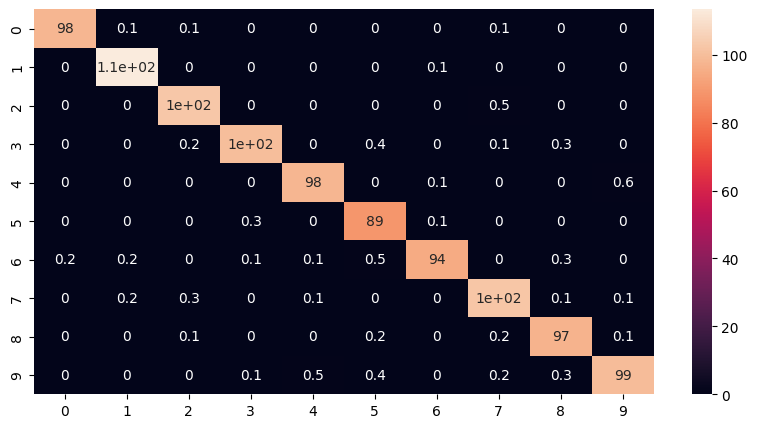

In [16]:
cmm=cm(y_test,predicted)
cmm=cmm/10
plt.figure(figsize=(10,5))
plt.xlabel("Predicted")
plt.ylabel("truth")
sb.heatmap(cmm,annot=True)

# Testing Model on my test dataset

(28, 28)

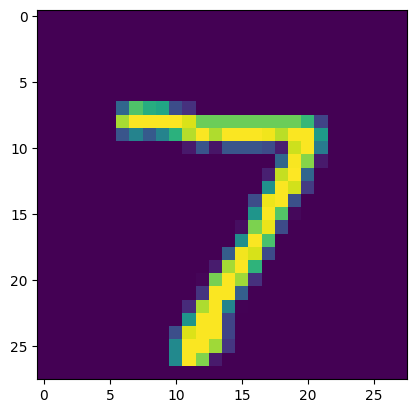

In [93]:
plt.imshow(x_test_scaled[0])
x_test_scaled[0].shape

In [94]:
resh=x_test_scaled[0].reshape(1,28,28)

In [97]:
np.argmax(cnn.predict(resh))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


7